<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Feature Engineering**


Estimated time needed: **45** minutes


A critical part of the successful Machine Learning project is coming up with a good set of features to train on. This process is called feature engineering, and it involves three steps: feature transformation (transforming the original features), feature selection (selecting the most useful features to train on), and feature extraction (combining existing features to produce more useful ones). In this notebook we will explore different tools in Feature Engineering.


## Objectives


After completing this lab you will be able to:


*   Understand the types of Feature Engineering
    *   Feature Transformation
        *   Dealing with Categorical Variables
            *   One Hot Encoding
            *   Label Encoding
        *   Date Time Transformations
    *   Feature Selection
    *   Feature Extraction using Principal Component Analysis


***


## **Setup**


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for mathematical operations.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`plotly.express`](https://plotly.com/python/plotly-express/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for visualizing the data.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01) for machine learning and machine-learning-pipeline related functions.


## **Installing Required Libraries**


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
!mamba install -qy openpyxl

'mamba' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Surpress warnings from using older version of sklearn:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## **Reading and understanding our data**


For this lab, we will be using the airlines_data.xlsx file, hosted on IBM Cloud object. This dataset contains the prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. This dataset is often used for prediction analysis of the flight prices which are influenced by various factors, such as name of the airline, date of journey, route, departure and arrival times, the source and the destination of the trip, duration and other parameters.

In this notebook, we will use the airlines dataset to perform feature engineering on some of its independent variables.


Let's start by reading the data into *pandas* data frame and looking at the first 5 rows using the `head()` method.


In [4]:
data = pd.read_excel('airlines_data.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


By using the `info` function, we will take a look at the types of data that our dataset contains.


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


As we see from the output above, we mostly have object data types, except for the 'price' column, which is an integer.


The `describe()` function provides the statistical information about the numerical variables. In our case, it is the 'price' variable.


In [6]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Next, we will check for any null values.


In [7]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

Now that we have found some null points, we need to either remove them from our dataset or fill them with something else. In this case, we will use `fillna()` and `method='ffill'`, which fills the last observed non-null value forward until another non-null value is encountered.


In [8]:
data = data.fillna(method='ffill')

## **Feature Transformation**


Feature Transformation means transforming our features to the functions of the original features. For example, feature encoding, scaling, and discretization (the process of transforming continuous variables into discrete form, by creating bins or intervals) are the most common forms of data transformation.


### **Dealing with Categorical Variables**


Categorical variables represent qualitative data with no apparent inherent mathematical meaning. Therefore, for any machine learning analysis, all the categorical data must be transformed into the numerical data types. First, we'll start with 'Airlines' column, as it contains categorical values. We will use `unique()` method to obtain all the categories in this column.


In [9]:
data['Airline'].unique().tolist()

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

From the above list, we notice that some of the airline names are being repeated. For example, 'Jet Airways' and 'Jet Airways Business'. This means that some of the airlines are subdivided into separate parts. We will combine these 'two-parts' airlines to make our categorical features more consistent with the rest of the variables.

Here, we will use the *numpy* `where()` function to locate and combine the two categories.


In [11]:
data['Airline'] = np.where(data['Airline']=='Vistara Premium economy', 'Vistara', data['Airline'])
data['Airline'] = np.where(data['Airline']=='Jet Airways Business', 'Jet Airways', data['Airline'])

## Exercise 1

In this exercise, use `np.where()` function to combine 'Multiple carriers Premium economy' and 'Multiple carriers' categories, like shown in the code above. Print the newly created list using `unique().tolist()` functions.


In [13]:
data['Airline'] = np.where(data['Airline'] == 'Multiple carriers Premium economy', 'Multiple carriers', data['Airline'])
data['Airline'].unique().tolist()

# Pandas
# data['Airline'] = data['Airline'].replace('Multiple carriers Premium economy', 'Multiple carriers')


['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Trujet']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\['Airline'] = np.where(data\['Airline']=='Multiple carriers Premium economy', 'Multiple carriers', data\['Airline'])
data\['Airline'].unique().tolist()

</code>
</details>


#### **One Hot Encoding**


Now, to be recognized by a machine learning algorithms, our categorical variables should be converted into numerical ones. One way to do this is through *one hot encoding*. To learn more about this process, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01).

We will use, `get_dummies()` method to do this transformation. In the next cell, we will transform 'Airline', 'Source', and 'Destination' into their respective numeric variables. We will put all the transformed data into a 'data1' data frame.


In [14]:
data1 = pd.get_dummies(data=data, columns = ['Airline', 'Source', 'Destination'])

In [15]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


Below, we will compare our original data frame with the transformed one.


In [16]:
data.shape

(10683, 11)

In [17]:
data1.shape

(10683, 28)

As we can see, we went from 11 original features in our dataset to 38. This is because *Pandas* `get_dummies()` approach when applied to a column with different categories (e.g. different airlines) will produce a new column (variable) for each unique categorical value (for each unique airline). It will place a one in the column corresponding to the categorical value present for that observation.


## Exercise 2

In this exercise, use `value_counts()` to determine the values distribution of the 'Total_Stops' parameter.


In [18]:
data1["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3492
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data\["Total_Stops"].value_counts()

</code>
</details>


#### **Label Encoding**


Since 'Total_Stops' is originally a categorical data type, we also need to convert it into numerical one. For this, we can perform a label encoding, where values are manually assigned to the corresponding keys, like "0" to a "non-stop", using the `replace()` function.


In [19]:
data1.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,False,True,False,True,False,False,False,False,False
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,True,False,False,False,True,False,False,False,False
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,False,True,False,True,False,False,False,False,False
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,False,False,False,True


### **Date Time Transformations**


#### **Transforming the 'Duration' time column**


Here, we will take a closer look at the 'Duration' variable. Duration is the time taken by a plane to reach its destination. It is the difference between the 'Dep_Time' and 'Arrival_Time'. In our dataset, the 'Duration' is expressed as a string, in hours and minutes. To be recognized by machine learning algorithms, we also need to transform it into numerical type.

The code below will iterate through each record in 'Duration' column and split it into hours and minutes, as two additional separate columns. Also, we want to add the 'Duration_hours' (in minutes) to the 'Duration_minutes' column to obtain a 'Duration_Total_mins' time, in minutes. The total duration time column will be useful feature for any regression type of analysis.


In [20]:
duration = list(data1['Duration'])
for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
data1['Duration_hours'] = dur_hours
data1['Duration_minutes'] =dur_minutes
data1.loc[:,'Duration_hours'] *= 60
data1['Duration_Total_mins']= data1['Duration_hours']+data1['Duration_minutes']

Print 'data1' data frame to see the newly created columns.


In [21]:
data1.head()

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Airline_Air Asia,Airline_Air India,...,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,False,False,...,False,False,False,False,False,False,True,120,50,170
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,False,True,...,False,True,False,False,False,False,False,420,25,445
2,9/06/2019,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,False,False,...,False,False,True,False,False,False,False,1140,0,1140
3,12/05/2019,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,False,False,...,False,True,False,False,False,False,False,300,25,325
4,01/03/2019,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,False,False,...,False,False,False,False,False,False,True,240,45,285


As you have noticed, three new columns were created: 'Duration_hours', 'Duration_minutes', and 'Duration_Total_mins' - all numerical values.


#### **Transforming the 'Departure' and 'Arrival' Time Columns**


Now, we will transform the 'Dep_Time' and 'Arrival_Time' columns to the appropriate date and time format. We will use *pandas* `to_datetime()` function for this.

We will split the 'Dep_Time' and 'Arrival_Time' columns into their corresponding hours and minutes columns.


In [22]:
data1["Dep_Hour"]= pd.to_datetime(data1['Dep_Time']).dt.hour
data1["Dep_Min"]= pd.to_datetime(data1['Dep_Time']).dt.minute

## Exercise 3

Now, let's transform the 'Arrival_Time' column.


In [24]:
data1["Arrival_Hour"] = pd.to_datetime(data1["Arrival_Time"]).dt.hour
data1["Arrival_Min"] = pd.to_datetime(data1["Arrival_Time"]).dt.minute


<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\["Arrival_Min"]= pd.to_datetime(data1\['Arrival_Time']).dt.minute

</code>
</details>


#### **Splitting 'Departure/Arrival_Time' into Time Zones**


To further transform our 'Departure/Arrival_Time' column, we can break down the 24 hours format for the departure and arrival time into 4 different time zones: night, morning, afternoon, and evening. This might be an interesting feature engineering technique to see what time of a day has the most arrivals/departures.

One way to do this is transformation is by using *pandas* `cut()` function.


In [25]:
data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
data1['dep_timezone'] 

0          Evening
1            Night
2          Morning
3        Afternoon
4        Afternoon
           ...    
10678      Evening
10679      Evening
10680      Morning
10681      Morning
10682      Morning
Name: dep_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

## Exercise 4

Now, let's transform the 'Arrival_Time' column into its corresponding time zones, as shown in the example above.


In [26]:
data1['arr_timezone'] = pd.cut(data1["Arrival_Hour"], [0, 6, 12, 18, 24], labels=["Night", "Morning", "Afternoon", "Evening"])
data1['arr_timezone']

0            Night
1        Afternoon
2            Night
3          Evening
4          Evening
           ...    
10678      Evening
10679      Evening
10680      Morning
10681    Afternoon
10682      Evening
Name: arr_timezone, Length: 10683, dtype: category
Categories (4, object): ['Night' < 'Morning' < 'Afternoon' < 'Evening']

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\["Arrival_Hour"]= pd.to_datetime(data1\['Arrival_Time']).dt.hour
data1\['arr_timezone'] = pd.cut(data1.Arrival_Hour, \[0,6,12,18,24], labels=\['Night','Morning','Afternoon','Evening'])

</code>
</details>


#### **Transforming the 'Date_of_Journey' Column**


Similar to the departure/arrival time, we will now extract some information from the 'date_of_journey' column, which is also an object type and can not be used for any machine learning algorithm yet.

So, we will extract the month information first and store it under the 'Month' column name.


In [27]:
data1['Month']= pd.to_datetime(data1["Date_of_Journey"], format="%d/%m/%Y").dt.month

## Exercise 5

Now, let's create 'Day' and 'Year' columns in a similar way.


In [30]:
data1['Day'] = pd.to_datetime(data1['Date_of_Journey'], format="%d/%m/%Y").dt.day
data1['Year'] = pd.to_datetime(data1['Date_of_Journey'], format="%d/%m/%Y").dt.year

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

data1\['Day']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.day
data1\['Year']= pd.to_datetime(data1\["Date_of_Journey"], format="%d/%m/%Y").dt.year

</code>
</details>


Additionally, we can extract the day of the weak name by using `dt.day_name()` function.


In [31]:
data1['day_of_week'] = pd.to_datetime(data1['Date_of_Journey']).dt.day_name()

## **Feature Selection**


Here, we will select only those attributes which best explain the relationship of the independent variables with respect to the target variable, 'price'. There are many methods for feature selection, building the heatmap and calculating the correlation coefficients scores are the most commonly used ones.

First, we will select only the relevant and newly transformed variables (and exclude variables such as 'Route', 'Additional_Info', and all the original categorical variables), and place them into a 'new_data' data frame.


We will print all of our data1 columns.


In [32]:
data1.columns

Index(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'dep_timezone',
       'arr_timezone', 'Month', 'Day', 'Year', 'day_of_week'],
      dtype='object')

In [40]:
new_data = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min', 'Price']]

In [41]:
new_data.head()

,Total_Stops,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_hours,Duration_minutes,Duration_Total_mins,Dep_Hour,Dep_Min,Price
0,0,False,False,False,True,False,False,False,False,False,...,False,False,False,True,120,50,170,22,20,3897
1,2,False,True,False,False,False,False,False,False,False,...,False,False,False,False,420,25,445,5,50,7662
2,2,False,False,False,False,True,False,False,False,False,...,False,False,False,False,1140,0,1140,9,25,13882
3,1,False,False,False,True,False,False,False,False,False,...,False,False,False,False,300,25,325,18,5,6218
4,1,False,False,False,True,False,False,False,False,False,...,False,False,False,True,240,45,285,16,50,13302


Now we will construct a `heatmap()`, using the *seaborn* library with a newly formed data frame, 'new_data'.


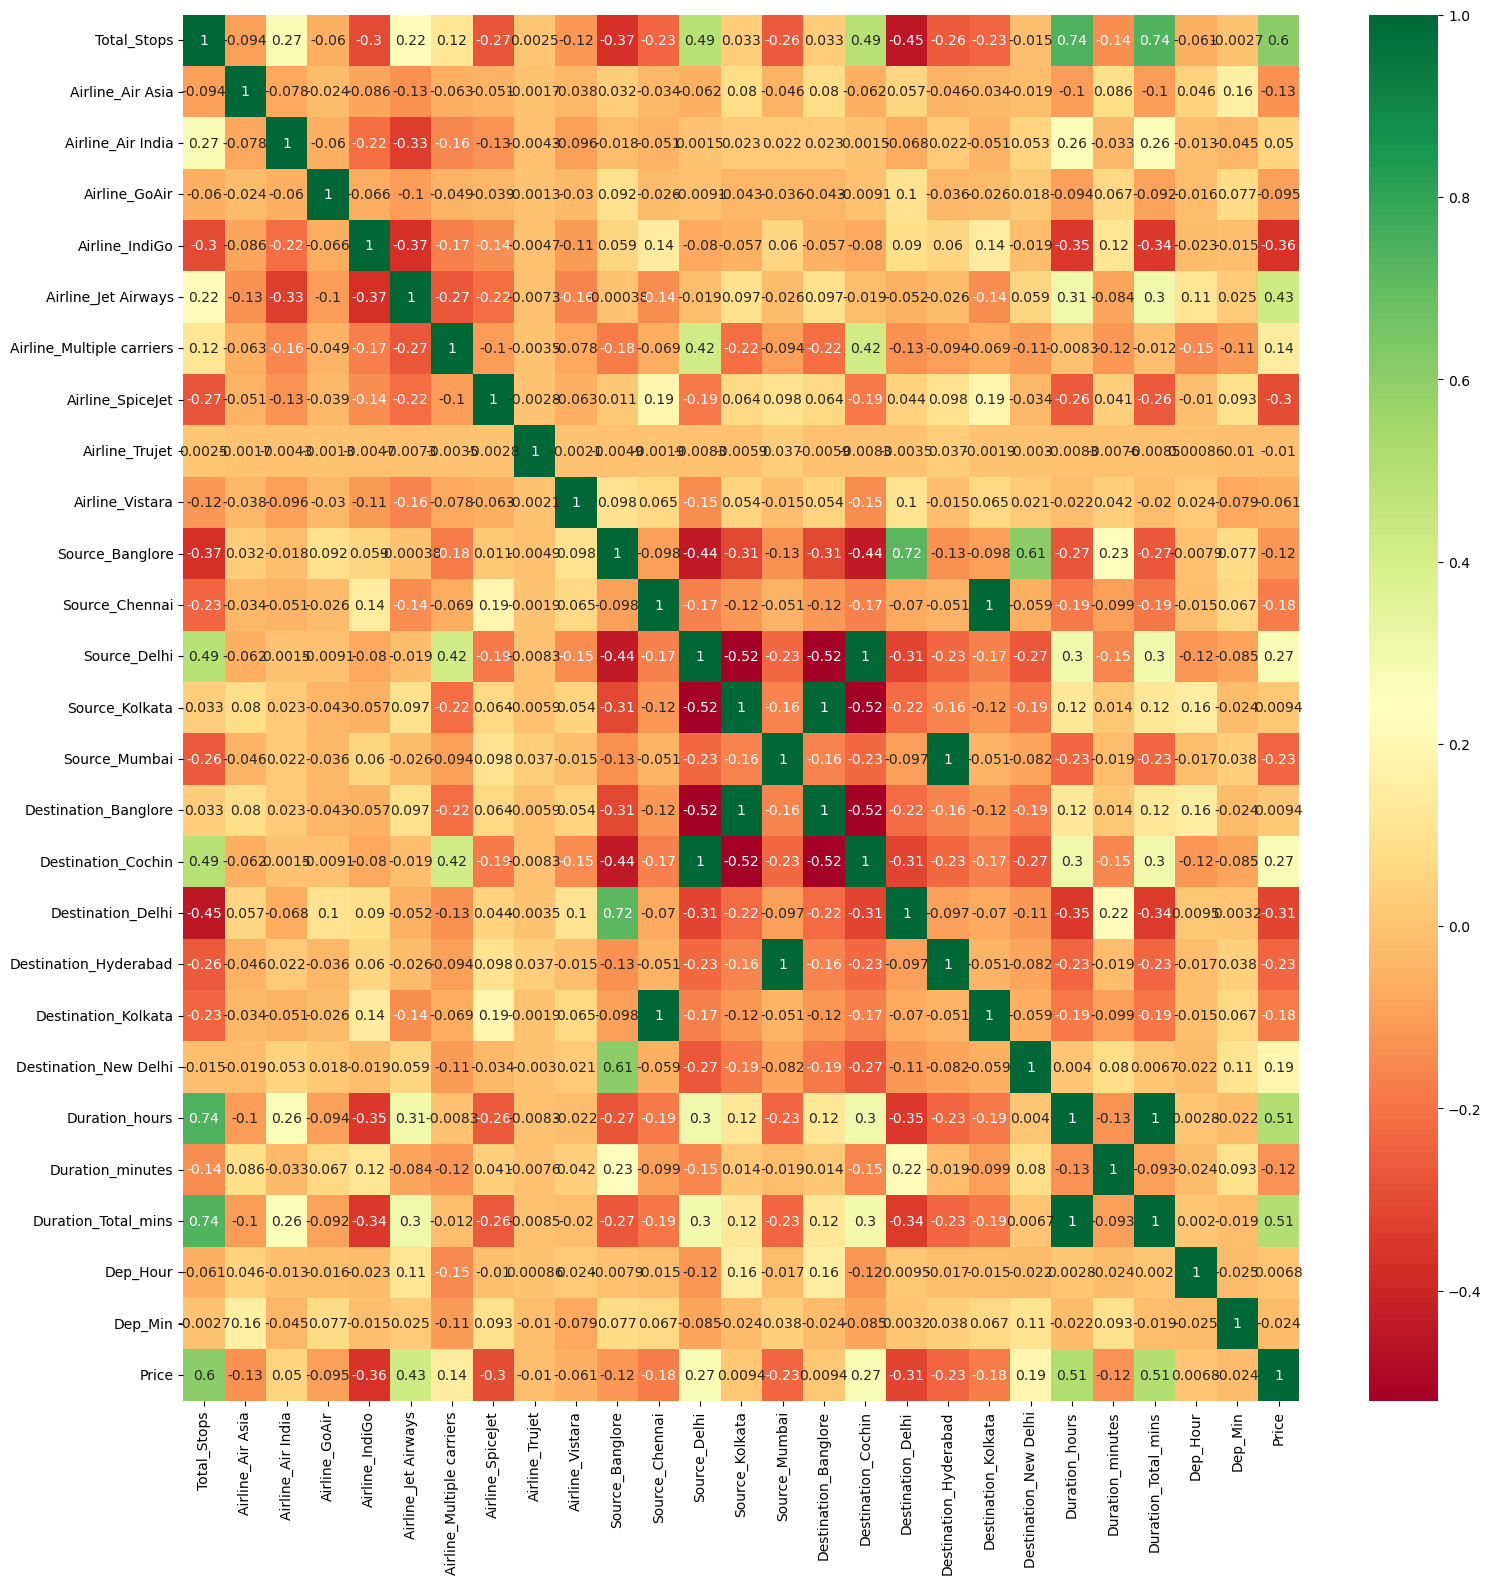

In [52]:
plt.figure(figsize=(18, 18))
ax = sns.heatmap(new_data.corr(),annot=True,cmap='RdYlGn')

From the heatmap above, extreme green means highly positively correlated features (relationship between two variables in which both variables move in the same direction), extreme red means negatively correlated features (relationship between two variables in which an increase in one variable is associated with a decrease in the other).


Now, we can use the `corr()` function to calculate and list the correlation between all independent variables and the 'price'.


In [53]:
features = new_data.corr()['Price'].sort_values()
features

Airline_IndiGo              -0.361048
Destination_Delhi           -0.313401
Airline_SpiceJet            -0.296552
Destination_Hyderabad       -0.230745
Source_Mumbai               -0.230745
Destination_Kolkata         -0.179216
Source_Chennai              -0.179216
Airline_Air Asia            -0.133044
Duration_minutes            -0.124874
Source_Banglore             -0.118026
Airline_GoAir               -0.095146
Airline_Vistara             -0.060503
Dep_Min                     -0.024492
Airline_Trujet              -0.010380
Dep_Hour                     0.006819
Source_Kolkata               0.009377
Destination_Banglore         0.009377
Airline_Air India            0.050346
Airline_Multiple carriers    0.141087
Destination_New Delhi        0.189785
Destination_Cochin           0.270619
Source_Delhi                 0.270619
Airline_Jet Airways          0.428490
Duration_Total_mins          0.506371
Duration_hours               0.508672
Total_Stops                  0.603891
Price       

We can also plot these correlation coefficients for easier visualization.


<Axes: >

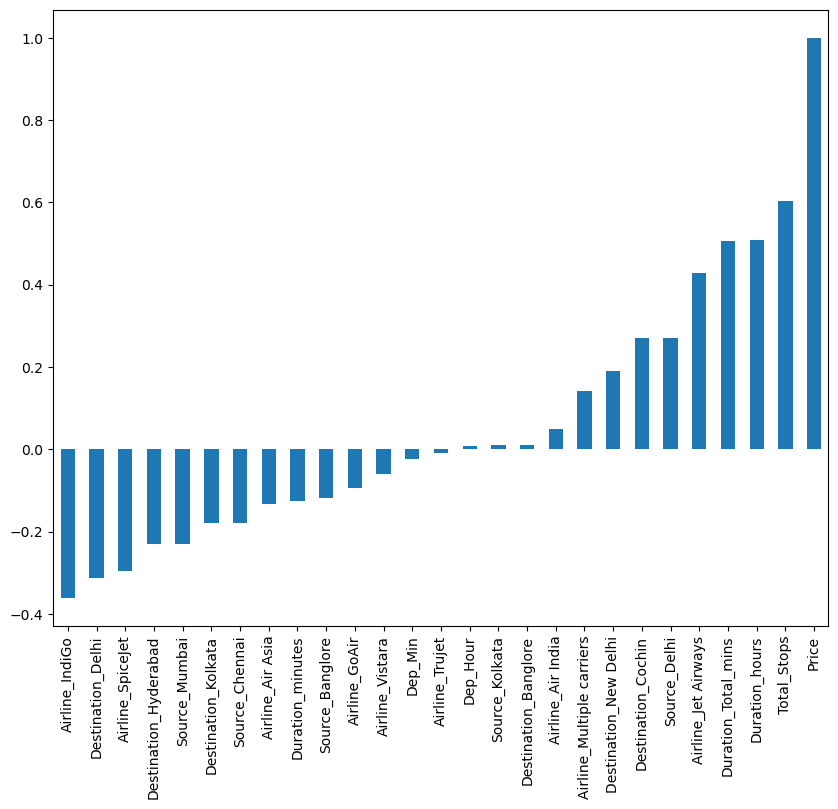

In [54]:
features.plot(kind='bar',figsize=(10,8))

From the graph above, we can deduct some of the highly correlated features and select only those ones for any future analysis.


## **Feature Extraction using Principal Component Analysis (Optional)**


### **PCA with Scikit-Learn**


Dimentionality reduction is part of the feature extraction process that combines the existing features to produce more useful ones. The goal of dimensionality reduction is to simplify the data without loosing too much information. Principal Component Analysis (PCA) is one of the most popular dimensionality reduction algorithms. First, it identifies the hyperplane that lies closest to the data, and then it projects the data onto it. In this way, a few multidimensional features are merged into one.

In the following portion of the lab, we will use `scikit-learn` library to perform some PCA on our data.
To learn more about `scikit-learn` PCA, please visit this [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01#sklearn.decomposition.PCA).


First, we must scale our data using the `StandardScaler()` function.
We will assign all the independent variables to x, and the dependent variable, 'price', to y.


In [55]:
x = data1.loc[:,['Total_Stops', 'Airline_Air Asia',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Multiple carriers', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_hours', 'Duration_minutes', 'Duration_Total_mins', 'Dep_Hour',
       'Dep_Min']]

In [56]:
y= data1.Price

In [60]:
scaler = StandardScaler()
x=scaler.fit_transform(x.astype(np.float64))
x

array([[-1.22052384, -0.17544122, -0.44291155, ..., -0.93158255,
         1.65425948, -0.23505036],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.39007152,
        -1.30309491,  1.36349161],
       [ 1.74150619, -0.17544122, -0.44291155, ...,  0.97847452,
        -0.60724682,  0.0313733 ],
       ...,
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.91189124,
        -0.78120884, -0.23505036],
       [-1.22052384, -0.17544122, -0.44291155, ..., -0.95127386,
        -0.25932278,  0.29779696],
       [ 1.74150619, -0.17544122,  2.25778713, ..., -0.28176932,
        -0.4332848 ,  1.62991527]], shape=(10683, 26))

Once the data is scaled, we can apply the `fit_transform()` function to reduce the dimensionality of the dataset down to two dimensions.


In [62]:
pca = PCA(n_components = 2)
pca.fit_transform(x)

array([[-2.87559235, -0.55520415],
       [ 0.31882945,  2.39235354],
       [ 3.05931822, -0.52686459],
       ...,
       [-2.24752702, -0.58854579],
       [-2.69895755, -0.28856263],
       [ 1.92548188, -1.10426513]], shape=(10683, 2))

### **Explained Variance Ratio**


Another useful piece of information in PCA is the explained variance ratio of each principal component, available via the `explained_variance_ratio_` function. The ratio indicates the proportion of the dataset's variance that lies along each principal component. Let's look at the explained variance ratio of each of our two components.


In [63]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.17545521, 0.12110719])

The first component constitutes 17.54% of the variance and second component constitutes 12.11% of the variance between the features.


## Exercise 6 (Optional)

In this exercise, experiment with the number of components to see how many dimensions our dataset could be reduced to in order to explain most of the variability between the features. Additionally, you can plot the components using bar plot to see how much variability each component represents.


In [ ]:
# Enter your code and run the cell


In [ ]:
# Enter your code and run the cell


<details>
<summary><strong>Solution_part1</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

pca = PCA(n_components = 7)
pca.fit_transform(x)
explained_variance=pca.explained_variance_ratio\_
explained_variance

</code>
</details>


<details>
<summary><strong>Solution_part2</strong> (Click Here)</summary>
    &emsp; &emsp; <code>

with plt.style.context('dark_background'):
    
    plt.figure(figsize=(6, 4))
    
    plt.bar(range(7), explained_variance, alpha=0.5, align='center', 
    label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout() 


</code>
</details>


### **Choosing the Right Number of Dimensions**

Instead of arbitrary choosing the number of dimensions to reduce down to, it is simpler to choose the number of dimensions that add up to a sufficiently large proportion of the variance, let's say 95%.

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the variance.


In [64]:
pca = PCA()
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >=0.95) + 1

In [65]:
d

np.int64(16)

There are 16 components required to meet 95% variance. Therefore, we could set n_components = 16 and run PCA again. However, there is better way, instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the ratio of variance you wish to preserve.


In [66]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x)

There is also a graphical way to determine the number of principal components in your analysis. It is to plot the explained variance as a function of the number of dimensions. There will usually be an elbow in the curve, where the explained variance stops growing fast. That point is usually the optimal point for the number of principal components.


In [67]:
px.area(
    x=range(1, cumsum.shape[0] + 1),
    y=cumsum,
    labels={"x": "# Components", "y": "Explained Variance"}
)

# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2022-01-17        | 0.1     | Svitlana   | Modified multiple areas |


Copyright © 2020 IBM Corporation. All rights reserved.
